In [1]:
#Forecast to demand of passenger traffic in airplanes
#Data is classifies as date,time and passengers travelling per month

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=10,6

In [3]:
dataset=pd.read_csv("AirPassengers.csv")

In [4]:
#parse strings to date time
dataset['Month']=pd.to_datetime(dataset['Month'],infer_datetime_format=True)
indexedDataset=dataset.set_index(['Month'])

C:\Users\91821\AppData\Local\Temp\ipykernel_20348\2838767846.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset['Month']=pd.to_datetime(dataset['Month'],infer_datetime_format=True)


In [5]:
from datetime import datetime
indexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
indexedDataset.tail(5)

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


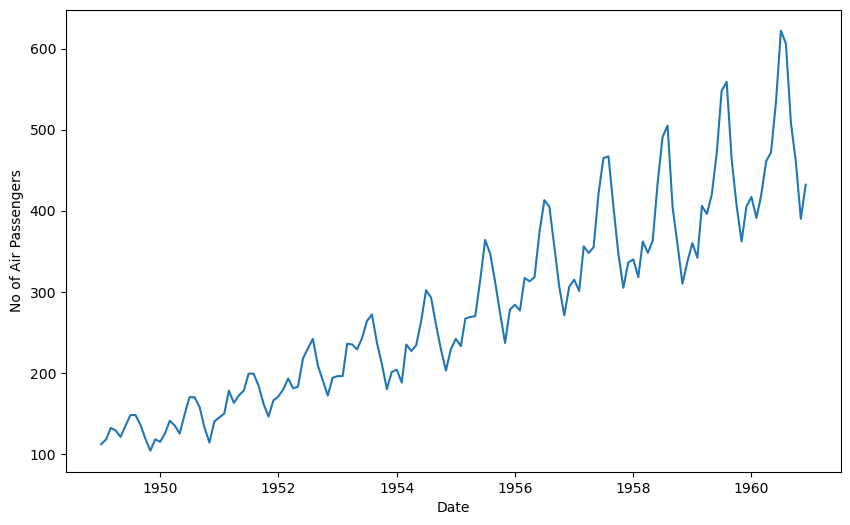

In [7]:
#graph to perform eda on dataset
plt.xlabel("Date")
plt.ylabel("No of Air Passengers")
plt.plot(indexedDataset)

In [8]:
#here we can see the trend of increase in no of airpassengers

In [9]:
#now the step is to check if the data is stationary or not
#its not stationary (mean not constannt)
#2 tests to check of stationarity
#1.Rolling statistics   2.Dicky Fuller

In [10]:
#Rolling statictics
#window of 12 months
rolmean=indexedDataset.rolling(window=12).mean()

rolstd=indexedDataset.rolling(window=12).std()

print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


In [11]:
#based on the window value its calculated,12 months altogether is calculated,if u give 365 day wise will be calculated

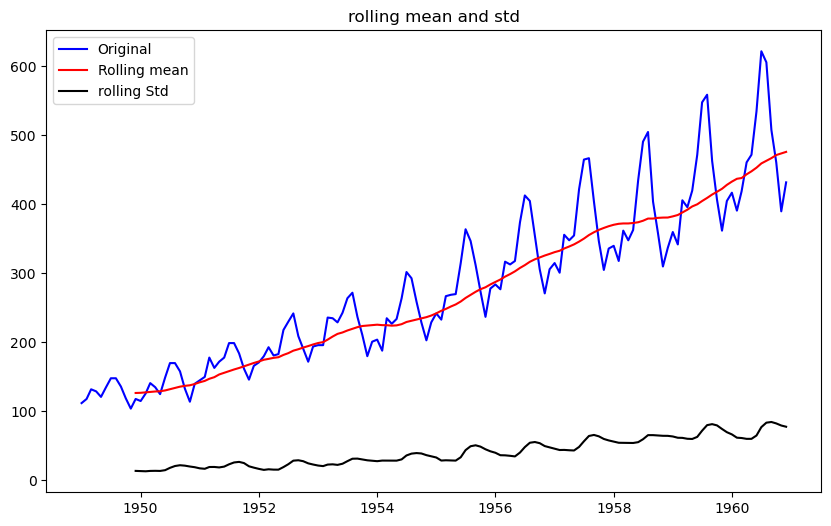

In [12]:
#plot the rolling statictics
orig=plt.plot(indexedDataset,color='blue',label='Original')
mean=plt.plot(rolmean,color="red",label="Rolling mean")
std=plt.plot(rolstd,color="black",label="rolling Std")
plt.legend(loc="best")
plt.title("rolling mean and std")
plt.show(block=False)

In [13]:
#in the above graph we can conclude the mean and std are not constant
#therefore data not stationary

In [14]:
#perform dicky
from statsmodels.tsa.stattools import adfuller

print("result of Dickty Fuller Test is:")
dftest=adfuller(indexedDataset['#Passengers'],autolag='AIC')
#aic tells what u want in time series
#exact value and actual matrix

dfoutput=pd.Series(dftest[0:4],index=['TestStatistic','p-value','#Lags Used','No of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s) '%key]=value
    
print(dfoutput)

result of Dickty Fuller Test is:
TestStatistic                0.815369
p-value                      0.991880
#Lags Used                  13.000000
No of observations used    130.000000
Critical value (1%)         -3.481682
Critical value (5%)         -2.884042
Critical value (10%)        -2.578770
dtype: float64


In [15]:
#critical values of various parts/intervals are obtained
#p value must be less
#null hypothesis says that not stationary to prove it wrong we need p to be less
#p is large
#cv must > test statictic
#we can conclude data is not stationary

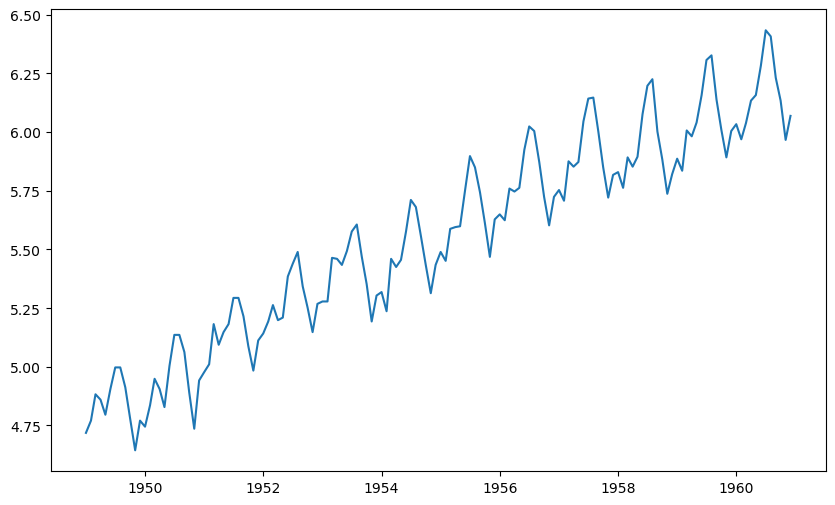

In [16]:
#trend estimation
indexedDataset_logscale=np.log(indexedDataset)
plt.plot(indexedDataset_logscale)

In [17]:
#trend same but scale changes

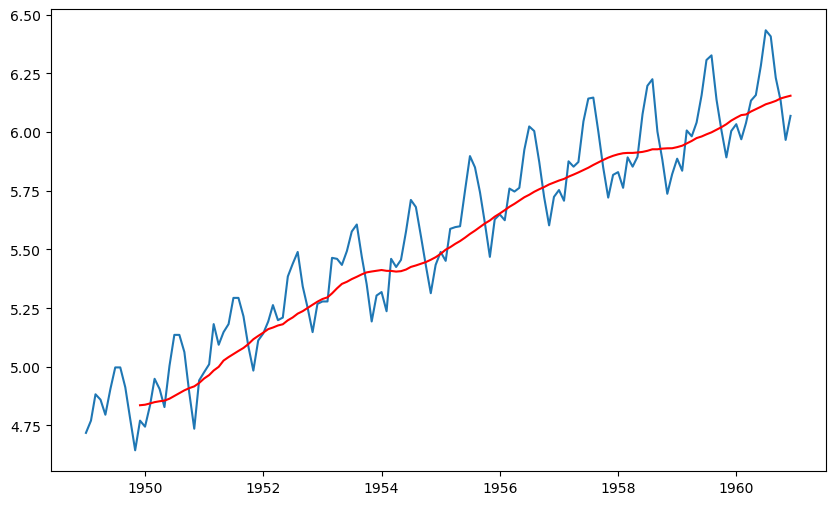

In [18]:
#calculate the above tests again
movingAverage=indexedDataset_logscale.rolling(window=12).mean()
movingSTD=indexedDataset_logscale.rolling(window=12).std()
plt.plot(indexedDataset_logscale)
plt.plot(movingAverage,color="red")

In [19]:
#again mean not stationary but its better than the previous times
#making the time series stationary is very important
#there are various ways to transform
datasetLogScaleMinusMa=indexedDataset_logscale-movingAverage
datasetLogScaleMinusMa.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [20]:
#remoning non
datasetLogScaleMinusMa.dropna(inplace=True)
datasetLogScaleMinusMa.head(12)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [21]:
#fn for calculating stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationatiry(timeseries):
    
    #rolling stats
    movingAverage=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    
    #plotting rolling stats
    orig=plt.plot(timeseries,color="blue",label="Original")
    mean=plt.plot(movingAverage,color="red",label="rolling mean")
    std=plt.plot(movingSTD,color="black",label="rolling std")
    plt.legend(loc="best")
    plt.title("rollingmean and std")
    plt.show(block=False)
    
    #dicky
    print("results of dicky fuller:")
    dftest=adfuller(timeseries["#Passengers"],autolag="AIC")
    dfout=pd.Series(dftest[0:4],index=["test statistic",'p-value','#lags used','no of observations used'])
    for key,value in dftest[4].items():
        dfout['Crtical value (%s):'%key]=value
    print(dfout)

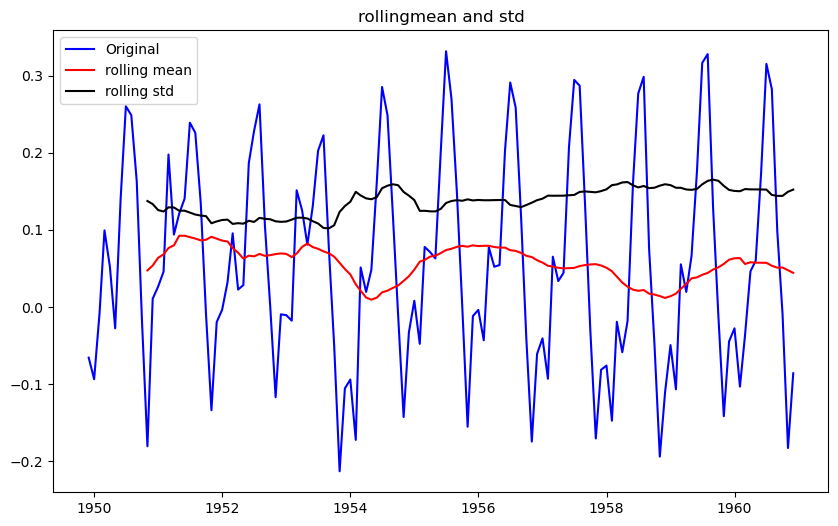

results of dicky fuller:
test statistic              -3.162908
p-value                      0.022235
#lags used                  13.000000
no of observations used    119.000000
Crtical value (1%):         -3.486535
Crtical value (5%):         -2.886151
Crtical value (10%):        -2.579896
dtype: float64


In [22]:
test_stationatiry(datasetLogScaleMinusMa)

In [23]:
#now hav better stationary data
#p value is also very less so this concludes that data is stationary
#crirical is almost equal to test stats therefore its stationatry data

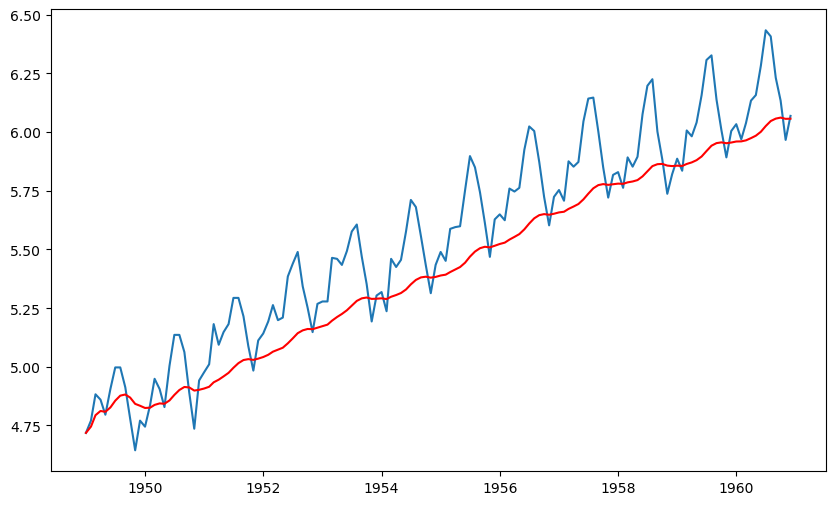

In [24]:
#weighted avg of time series
expoDecay=indexedDataset_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(expoDecay,color='red')

In [25]:
#in the above graph the trend can be visualised
#as timeseries peogresses the weighted avg progresses


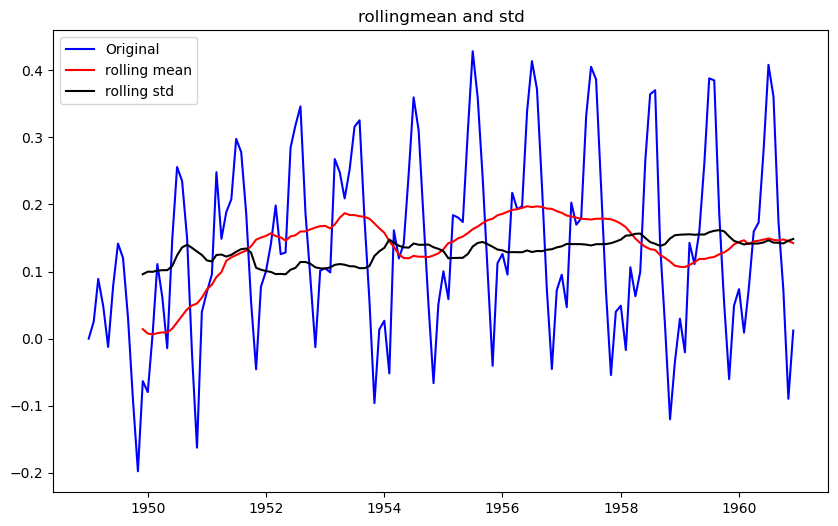

results of dicky fuller:
test statistic              -3.601262
p-value                      0.005737
#lags used                  13.000000
no of observations used    130.000000
Crtical value (1%):         -3.481682
Crtical value (5%):         -2.884042
Crtical value (10%):        -2.578770
dtype: float64


In [26]:
#now weighter mean is subtracted
datasetLogScaleMinusDecay=indexedDataset_logscale-expoDecay
test_stationatiry(datasetLogScaleMinusDecay)

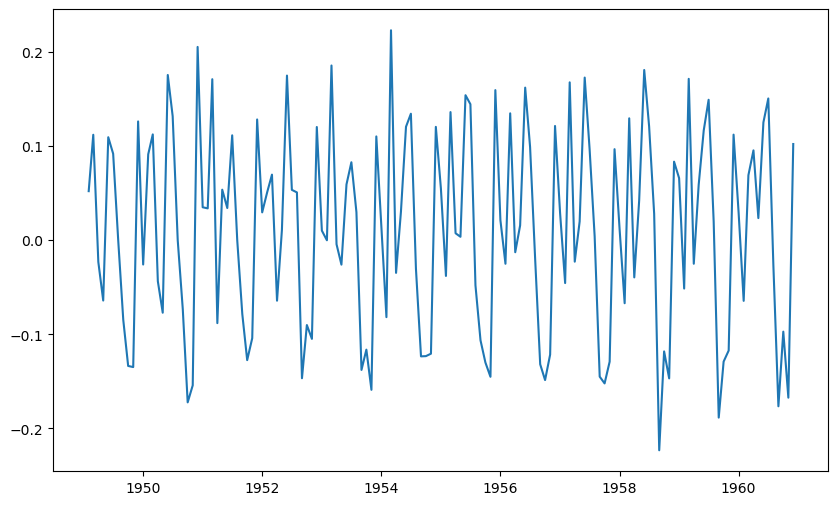

In [27]:
#here std is quite flat
#p is less
#time series is stationary
#shape to time series for forecasting
datasetLogDiffShifting=indexedDataset_logscale-indexedDataset_logscale.shift()
plt.plot(datasetLogDiffShifting)

In [28]:
#lag of 1 is obtained

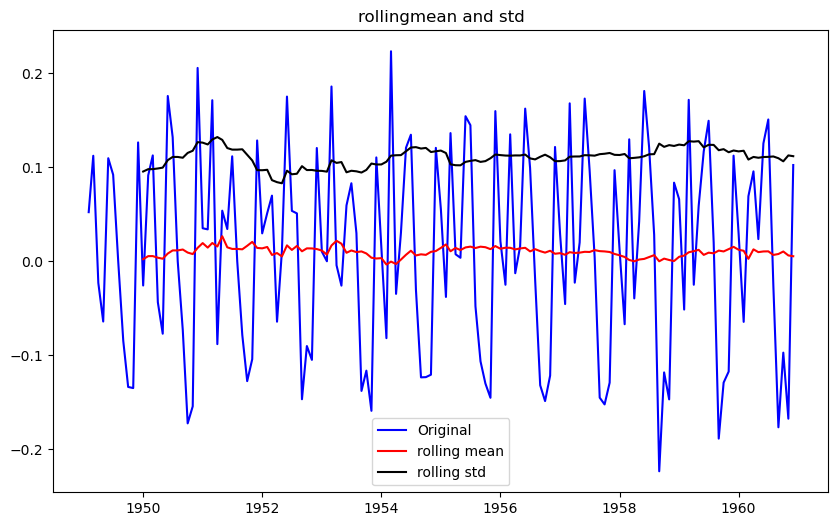

results of dicky fuller:
test statistic              -2.717131
p-value                      0.071121
#lags used                  14.000000
no of observations used    128.000000
Crtical value (1%):         -3.482501
Crtical value (5%):         -2.884398
Crtical value (10%):        -2.578960
dtype: float64


In [29]:
#here time series obtained
#arima has ar-autoregressive,ma model is moving avg,i for integration part=1
datasetLogDiffShifting.dropna(inplace=True)
test_stationatiry(datasetLogDiffShifting)

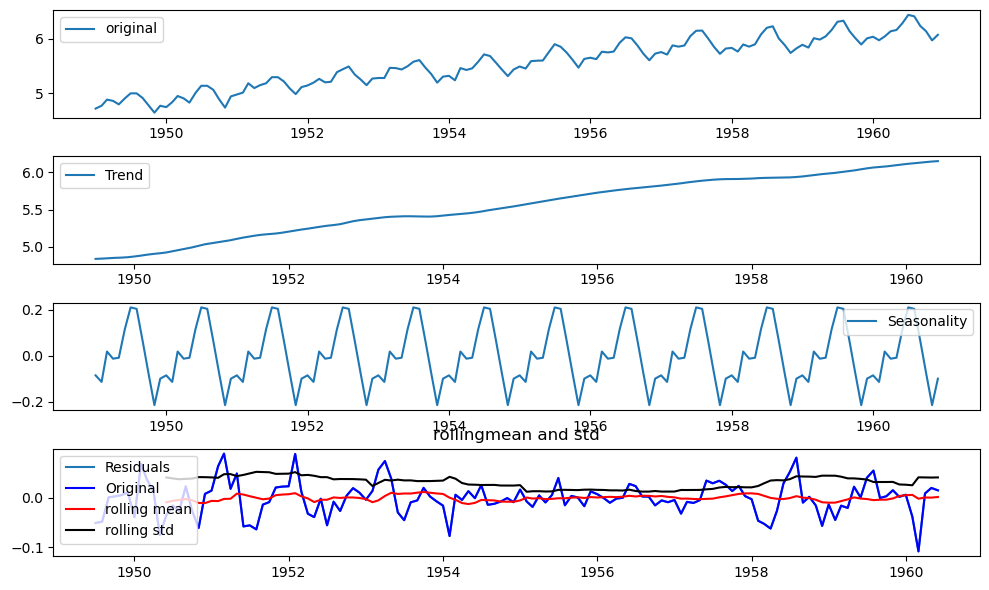

results of dicky fuller:
test statistic            -6.332387e+00
p-value                    2.885059e-08
#lags used                 9.000000e+00
no of observations used    1.220000e+02
Crtical value (1%):       -3.485122e+00
Crtical value (5%):       -2.885538e+00
Crtical value (10%):      -2.579569e+00
dtype: float64


In [30]:
#nan is dropeed
#no trend
#components of time series
from statsmodels.tsa.seasonal import seasonal_decompose
#segrgates 3 components
decomposition=seasonal_decompose(indexedDataset_logscale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logscale,label="original")
plt.legend(loc="best")

plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc="best")

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc="best")

plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc="best")

plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
decomposedLogData = pd.DataFrame(decomposedLogData)
decomposedLogData.columns = ["#Passengers"]
test_stationatiry(decomposedLogData)

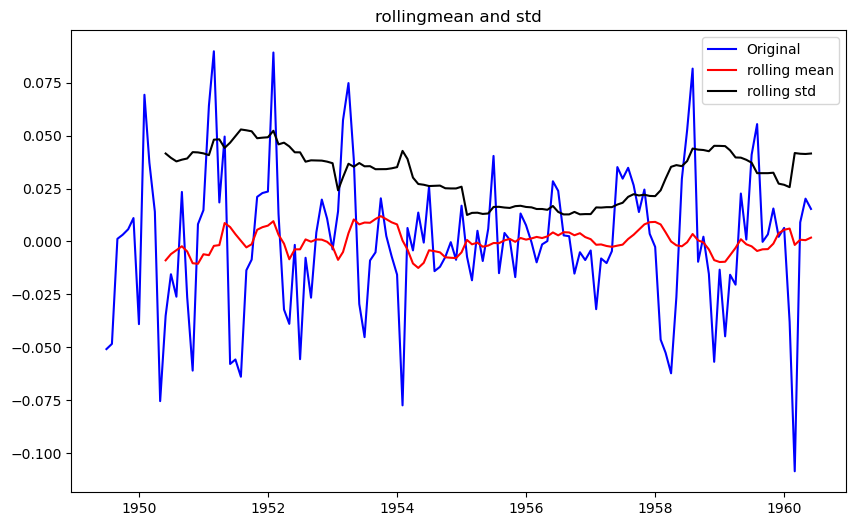

results of dicky fuller:
test statistic            -6.332387e+00
p-value                    2.885059e-08
#lags used                 9.000000e+00
no of observations used    1.220000e+02
Crtical value (1%):       -3.485122e+00
Crtical value (5%):       -2.885538e+00
Crtical value (10%):      -2.579569e+00
dtype: float64


In [31]:
#trend is linear
#residuality has no shape-irregularity
#we will hav to check for the stationarity of the residual
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
decomposedLogData = pd.DataFrame(decomposedLogData)
decomposedLogData.columns = ["#Passengers"]
test_stationatiry(decomposedLogData)

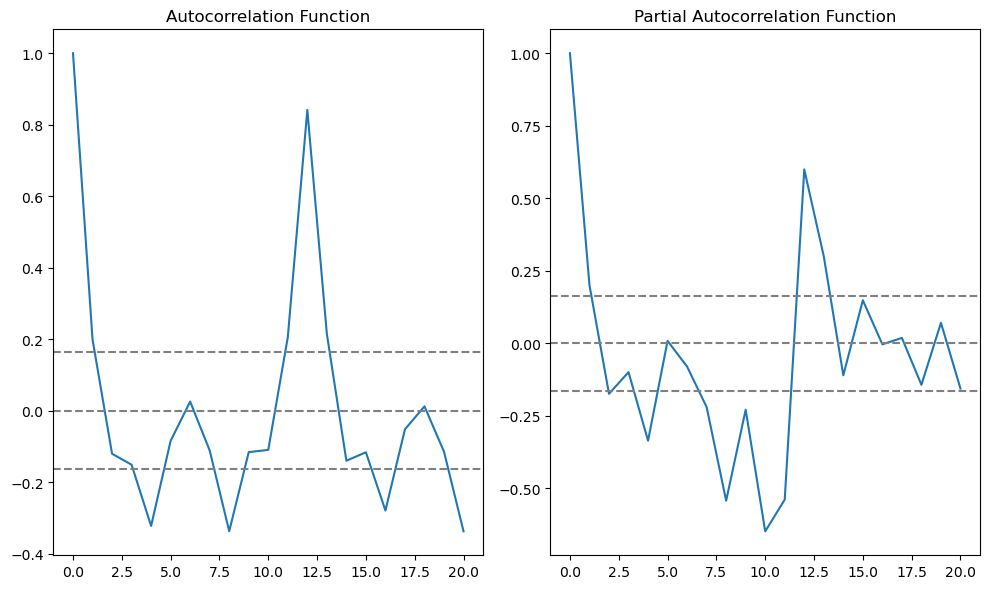

In [32]:
#how to get the value of p and q
#that can be extracted from acf(q) and pacf(p)
from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf(datasetLogDiffShifting,nlags=20)
lag_pacf=pacf(datasetLogDiffShifting,nlags=20,method='ols')

#plotting acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle="--",color="gray")
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle="--",color="gray")
plt.title("Autocorrelation Function")

#plotting pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle="--",color="gray")
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle="--",color="gray")
plt.title("Partial Autocorrelation Function")

plt.tight_layout()

In [33]:
#we hav got the value
#what value graph drops for the first time
# p and q is around 2
#substitue in arima model

In [34]:
# from statsmodels.tsa.arima.model import ARIMA
 #ar model
# model=ARIMA(indexedDataset_logscale,order=(2,1,2))
# results_AR=model.fit()


In [35]:
# %pip install statsmodels

C:\Users\91821\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91821\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\91821\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 128.890
Date:                Sun, 17 Mar 2024   AIC                           -247.780
Time:                        17:34:32   BIC                           -232.965
Sample:                    01-01-1949   HQIC                          -241.760
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2431      0.166      1.469      0.142      -0.081       0.568
ar.L2          0.2677      0.199      1.344      0.179      -0.123       0.658
ma.L1         -0.0867      0.118     -0.732      0.4

Text(0.5, 1.0, 'RSS:  nan')

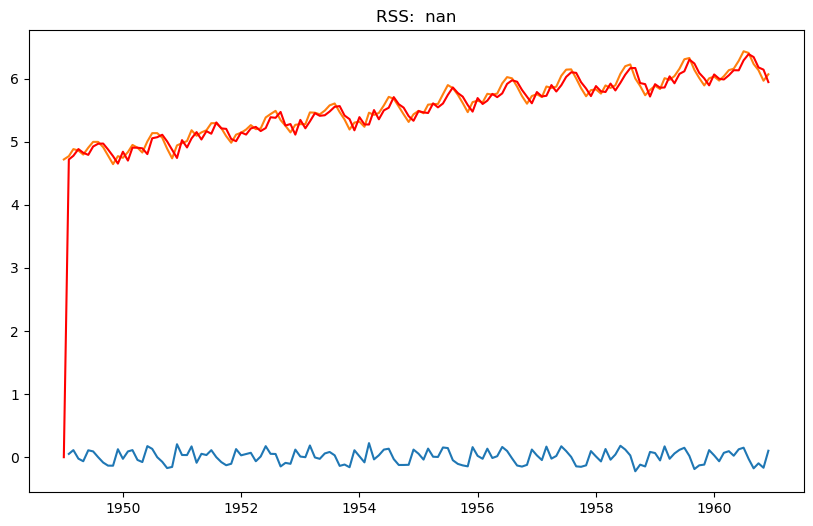

In [39]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(indexedDataset_logscale,order=(2,1,2)) 
results_AR=model.fit()
print(results_AR.summary())
plt.plot(datasetLogDiffShifting)
plt.plot(indexedDataset_logscale)
plt.plot(results_AR.fittedvalues,color="red")

plt.title('RSS: %4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))

In [40]:
predictions=pd.Series(results_AR.fittedvalues, copy=True)
print(predictions.head())

Month
1949-01-01    0.000000
1949-02-01    4.718499
1949-03-01    4.776385
1949-04-01    4.883216
1949-05-01    4.824423
dtype: float64


In [41]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

Month
1949-01-01     0.000000
1949-02-01     4.718499
1949-03-01     9.494884
1949-04-01    14.378099
1949-05-01    19.202522
dtype: float64


In [46]:
predictions_log=pd.Series(datasetLogDiffShifting['#Passengers'].Ix[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

AttributeError: 'Series' object has no attribute 'Ix'

In [47]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

NameError: name 'predictions_log' is not defined